In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.listdir()

['.ipynb_checkpoints',
 'Bangalore House Price Prediction.ipynb',
 'Bengaluru_House_Data.csv',
 'Categorical Encoding.ipynb',
 'Feature Engineering.ipynb',
 'Fish weight prediction.ipynb',
 'ks-projects-201801.csv']

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
data.shape

(13320, 9)

In [4]:

data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Handling Missing Values

In [8]:
from sklearn.impute import KNNImputer,SimpleImputer

In [9]:
data1 = data.copy()

In [10]:
data1['bath'] = data1['bath'].fillna(2)
data1['balcony'] = data1['balcony'].fillna(1)

In [11]:
data1 = data1.astype({'bath':int,'balcony':int})

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  int32  
 7   balcony       13320 non-null  int32  
 8   price         13320 non-null  float64
dtypes: float64(1), int32(2), object(6)
memory usage: 832.6+ KB


In [13]:
imputer1 = SimpleImputer(strategy='most_frequent')
data1['society'] = imputer1.fit_transform(np.array(data1['society']).reshape(-1,1))
data1['location'] = data1['location'].fillna(method="ffill")
data1.isna().sum()

area_type        0
availability     0
location         0
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [14]:
data1['size'].fillna(method='ffill',inplace=True)
data1.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [15]:
data1['bhk'] = data1['size'].apply(lambda x: int(x.split()[0]))
data1.drop(['size'],axis=1,inplace=True)

In [16]:
data1 = data1.assign(Availability=(data1['availability']=='Ready To Move').astype(int))
data1.drop(['availability'],axis=1,inplace=True)
data1.head()

,area_type,location,society,total_sqft,bath,balcony,price,bhk,Availability
0,Super built-up Area,Electronic City Phase II,Coomee,1056,2,1,39.07,2,0
1,Plot Area,Chikka Tirupathi,Theanmp,2600,5,3,120.00,4,1
2,Built-up Area,Uttarahalli,GrrvaGr,1440,2,3,62.00,3,1
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521,3,1,95.00,3,1
4,Super built-up Area,Kothanur,GrrvaGr,1200,2,1,51.00,2,1


In [17]:
def total_sqft(x):
    splits = x.split('-')
    if len(splits)==2:
        return (float(splits[0]) + float(splits[1]))/2
    try:
        return float(x)
    except:
        return np.NaN

In [18]:
data1['total_sqft'] = data1['total_sqft'].apply(total_sqft)

In [19]:
data1.isna().sum()

area_type        0
location         0
society          0
total_sqft      46
bath             0
balcony          0
price            0
bhk              0
Availability     0
dtype: int64

In [20]:
imputer2 = KNNImputer()

data1['total_sqft'] = imputer2.fit_transform(np.array(data1['total_sqft']).reshape(-1,1))
data1.isna().sum()

area_type       0
location        0
society         0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
Availability    0
dtype: int64

In [21]:
data1 = data1.assign(price_pre_sqft=(data1['price']*100000)/data1['total_sqft'])

In [22]:
data1.head()


,area_type,location,society,total_sqft,bath,balcony,price,bhk,Availability,price_pre_sqft
0,Super built-up Area,Electronic City Phase II,Coomee,1056.0,2,1,39.07,2,0,3699.810606
1,Plot Area,Chikka Tirupathi,Theanmp,2600.0,5,3,120.00,4,1,4615.384615
2,Built-up Area,Uttarahalli,GrrvaGr,1440.0,2,3,62.00,3,1,4305.555556
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521.0,3,1,95.00,3,1,6245.890861
4,Super built-up Area,Kothanur,GrrvaGr,1200.0,2,1,51.00,2,1,4250.000000


### Exploratory Data Analysis

In [23]:
categorical = data1.select_dtypes(include=['object']).columns
numerical = data1.select_dtypes(include=['int32','float64']).columns

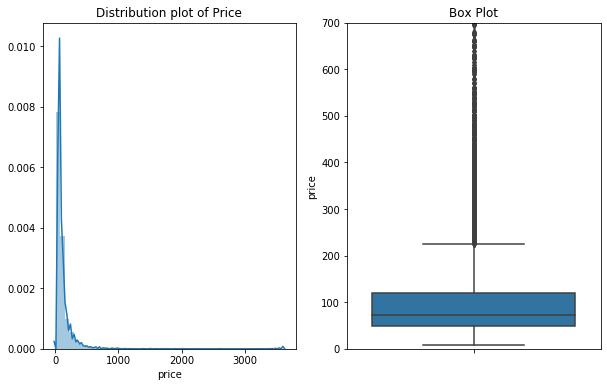

In [24]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.distplot(data1.price)
plt.title("Distribution plot of Price")
plt.subplot(1,2,2)
sns.boxplot(y=data1.price)
plt.ylim(0,700)
plt.title("Box Plot")

plt.show()

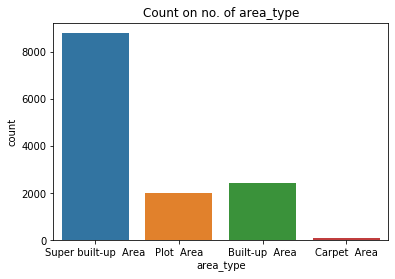

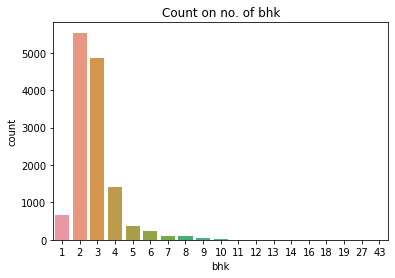

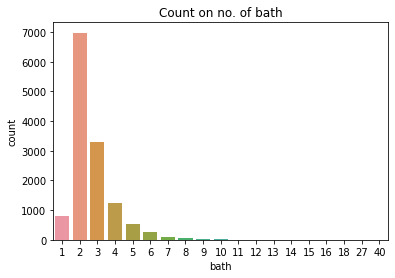

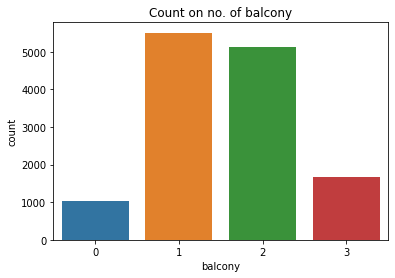

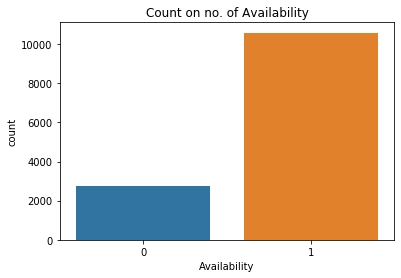

In [25]:
columns = ['area_type','bhk','bath','balcony','Availability',]
def countplot(df,x):
    sns.countplot(df[x])
    plt.title('Count on no. of '+x)
    plt.show()

for column in columns:
    countplot(data1,column)

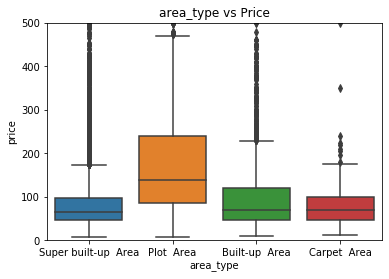

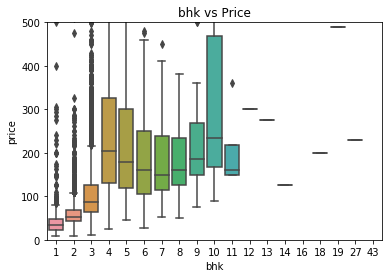

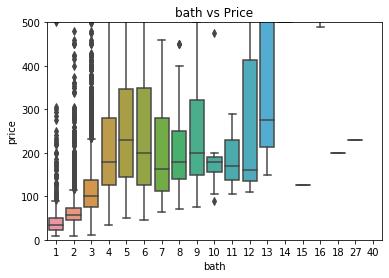

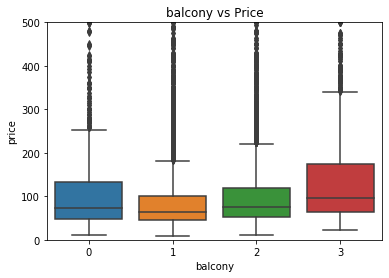

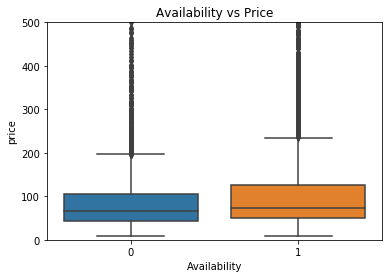

In [26]:
def vsplot(df,x):
    sns.boxplot(x=x,y='price',data=data1)
    plt.ylim(0,500)
    plt.title(""+x+" vs Price")
    plt.show()
    
for column in columns:
    vsplot(data1,column)

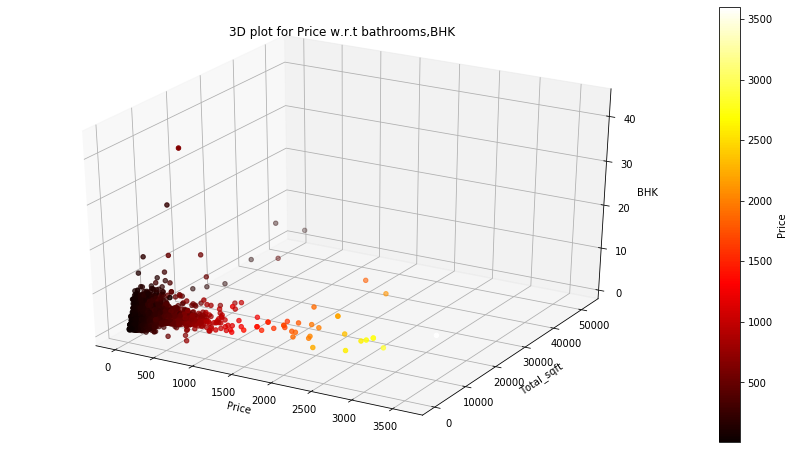

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')

plot = ax.scatter(data1.price,data1.total_sqft,data1.bhk,c=data1['price'],cmap='hot')

ax.set_xlabel('Price')
ax.set_ylabel('Total_sqft')
ax.set_zlabel('BHK')

plt.title("3D plot for Price w.r.t bathrooms,BHK")

lab = fig.colorbar(plot)
lab.set_label('Price')

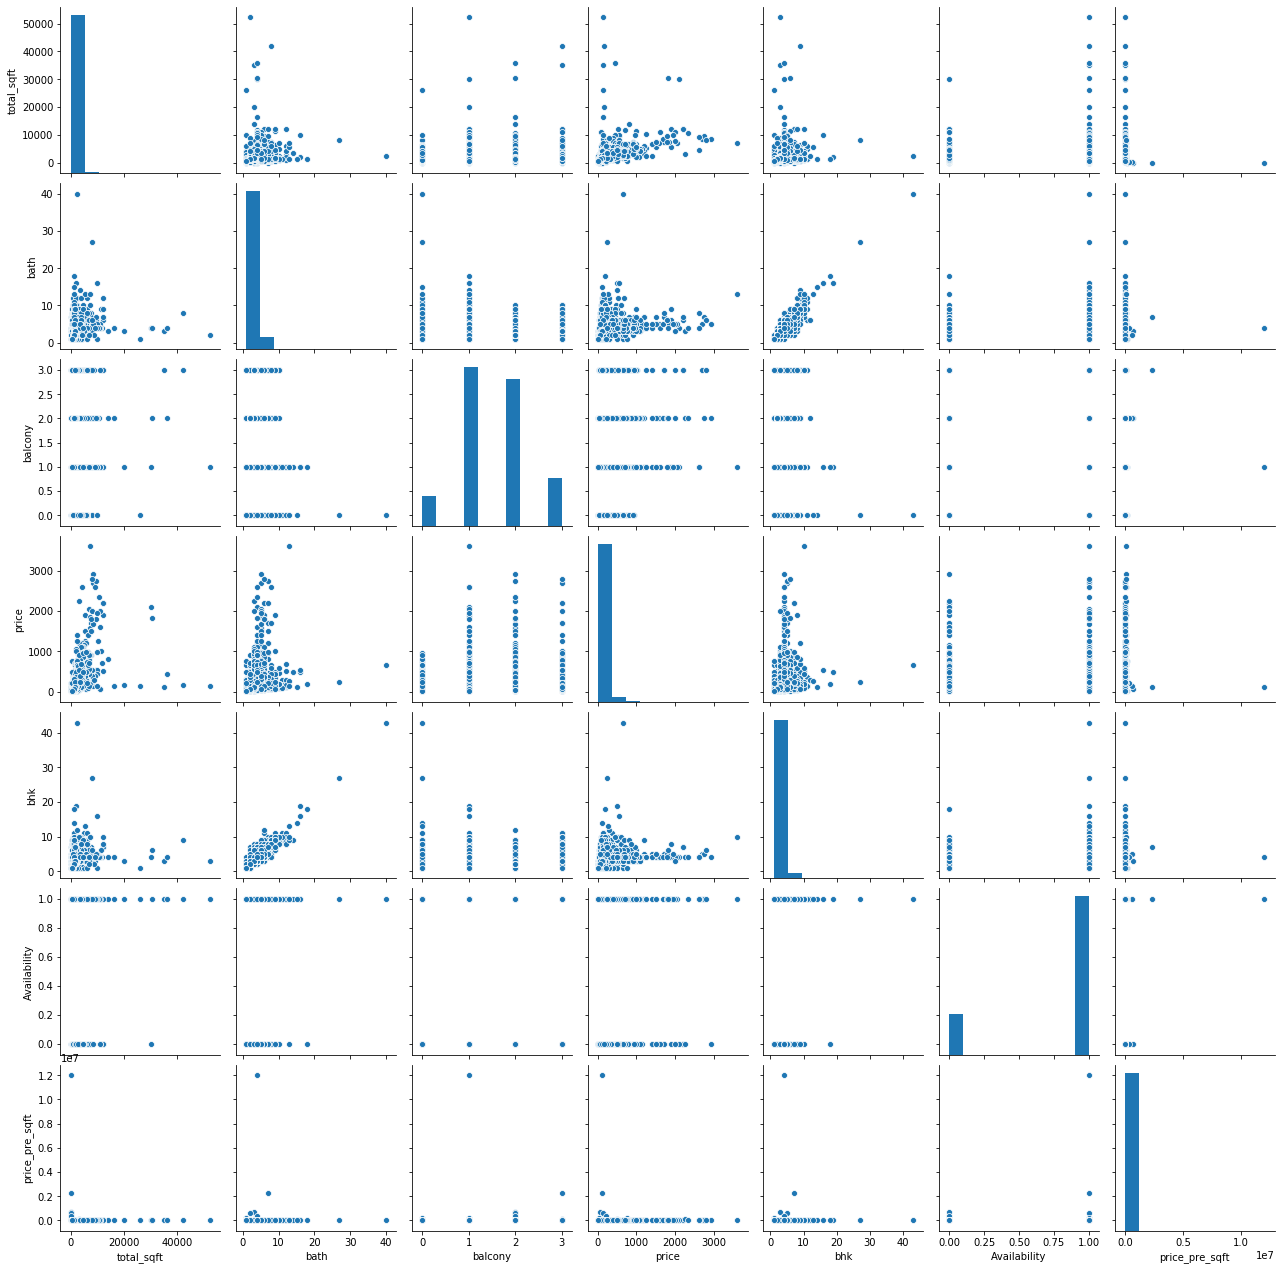

In [28]:
sns.pairplot(data1)

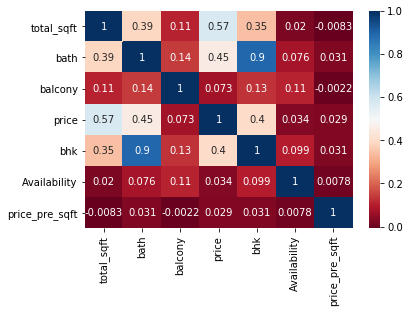

In [29]:
sns.heatmap(data1.corr(),annot=True,cmap='RdBu')

## Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(data1['area_type'])
data1 = data1.assign(Area_type=encoded)
data1.drop('area_type',axis=1,inplace=True)
data1.head()

,location,society,total_sqft,bath,balcony,price,bhk,Availability,price_pre_sqft,Area_type
0,Electronic City Phase II,Coomee,1056.0,2,1,39.07,2,0,3699.810606,3
1,Chikka Tirupathi,Theanmp,2600.0,5,3,120.00,4,1,4615.384615,2
2,Uttarahalli,GrrvaGr,1440.0,2,3,62.00,3,1,4305.555556,0
3,Lingadheeranahalli,Soiewre,1521.0,3,1,95.00,3,1,6245.890861,3
4,Kothanur,GrrvaGr,1200.0,2,1,51.00,2,1,4250.000000,3


In [32]:
len(data1.location.unique())

1305

In [33]:
data1.location = data1.location.apply(lambda x: x.strip())

location_stat = data1['location'].value_counts()

In [34]:
location_stat_less_10 = location_stat[location_stat<=10]
location_stat_less_10

Nagadevanahalli         10
Basapura                10
Nagappa Reddy Layout    10
Ganga Nagar             10
Sector 1 HSR Layout     10
                        ..
Ckikkakammana Halli      1
Mudalpalaya              1
CHIKKATIRUPATHI          1
Gandhi Nagar             1
1Hoysalanagar            1
Name: location, Length: 1053, dtype: int64

In [35]:
data1.location = data1['location'].apply(lambda x: 'other' if x in location_stat_less_10 else x)
len(data1.location.unique())

242

In [36]:
data1.head(10)

,location,society,total_sqft,bath,balcony,price,bhk,Availability,price_pre_sqft,Area_type
0,Electronic City Phase II,Coomee,1056.0,2,1,39.07,2,0,3699.810606,3
1,Chikka Tirupathi,Theanmp,2600.0,5,3,120.00,4,1,4615.384615,2
2,Uttarahalli,GrrvaGr,1440.0,2,3,62.00,3,1,4305.555556,0
3,Lingadheeranahalli,Soiewre,1521.0,3,1,95.00,3,1,6245.890861,3
4,Kothanur,GrrvaGr,1200.0,2,1,51.00,2,1,4250.000000,3
5,Whitefield,DuenaTa,1170.0,2,1,38.00,2,1,3247.863248,3
6,Old Airport Road,Jaades,2732.0,4,1,204.00,4,0,7467.057101,3
7,Rajaji Nagar,Brway G,3300.0,4,1,600.00,4,1,18181.818182,3
8,Marathahalli,GrrvaGr,1310.0,3,1,63.25,3,1,4828.244275,3
9,other,GrrvaGr,1020.0,6,1,370.00,6,1,36274.509804,2


## Outlier  Removal

In [37]:
data1[data1.total_sqft/data1.bhk<300].head()

,location,society,total_sqft,bath,balcony,price,bhk,Availability,price_pre_sqft,Area_type
9,other,GrrvaGr,1020.0,6,1,370.0,6,1,36274.509804,2
45,HSR Layout,GrrvaGr,600.0,9,1,200.0,8,1,33333.333333,2
58,Murugeshpalya,GrrvaGr,1407.0,4,1,150.0,6,1,10660.980810,2
68,Devarachikkanahalli,GrrvaGr,1350.0,7,0,85.0,8,1,6296.296296,2
70,other,GrrvaGr,500.0,3,2,100.0,3,1,20000.000000,2


In [38]:
data2 = data1[~(data1.total_sqft/data1.bhk<300)]
data2.shape

(12572, 10)

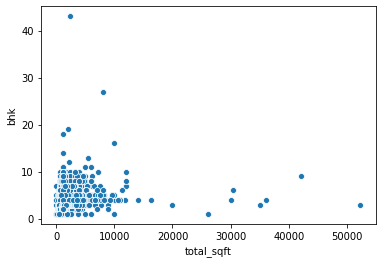

In [39]:
sns.scatterplot(data1.total_sqft,data1.bhk)

(0, 45)

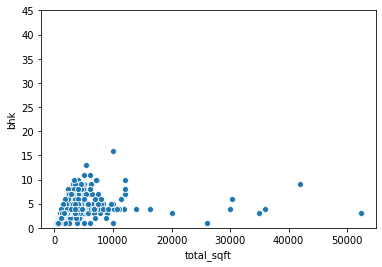

In [40]:
sns.scatterplot(data2.total_sqft,data2.bhk)
plt.ylim(0,45)

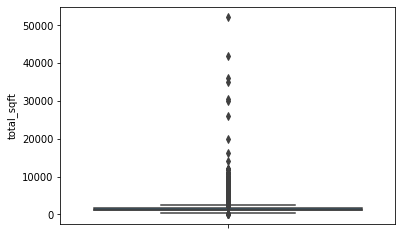

In [41]:
sns.boxplot(y=data1.total_sqft)


In [42]:
q1,q3 = data1['total_sqft'].quantile([0.25,0.75])

iqr = q3-q1

lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

print(lower_bound,upper_bound)

233.0 2545.0


In [43]:
outliers = data1[~((data1.total_sqft<lower_bound)|(data1.total_sqft>upper_bound))]

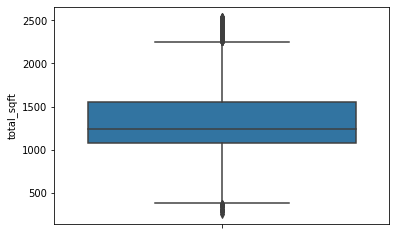

In [44]:
sns.boxplot(y=outliers.total_sqft)

(0, 10000)

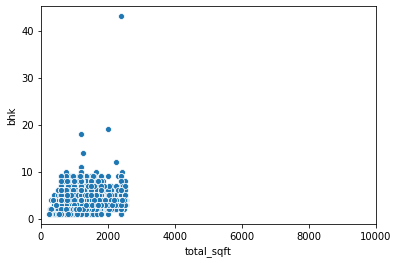

In [45]:
sns.scatterplot(outliers.total_sqft,outliers.bhk)
plt.xlim(0,10000)

In [46]:
outliers.shape

(12148, 10)

In [47]:
data1.shape

(13320, 10)

In [48]:
from sklearn.ensemble import IsolationForest

In [49]:
iso = IsolationForest(contamination=0.1)

iso.fit(data1[['total_sqft']])

predict = iso.predict(data1[['total_sqft']])

outliers1 = data1[predict==1]


In [50]:
outliers1.shape

(11992, 10)

(0, 30)

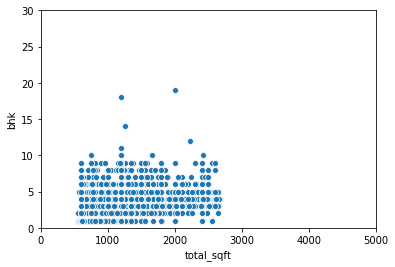

In [51]:
sns.scatterplot(outliers1.total_sqft,outliers1.bhk)
plt.xlim(0,5000)
plt.ylim(0,30)

In [52]:
outliers.total_sqft.min()
print(outliers1.total_sqft.min())

560.0


In [53]:
d = data1.select_dtypes(exclude=['object'])

In [54]:
iso.fit(d)
pred = iso.predict(d)

outliers3 = d[predict==1]

In [55]:
outliers3.shape



(11992, 8)

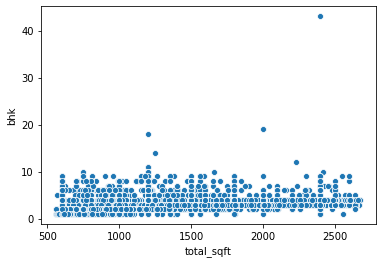

In [56]:
sns.scatterplot(outliers3.total_sqft,outliers3.bhk)

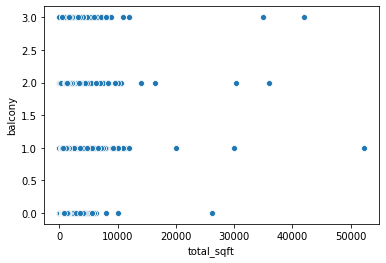

In [57]:
sns.scatterplot(data1.total_sqft,data1.balcony)

(0, 5000)

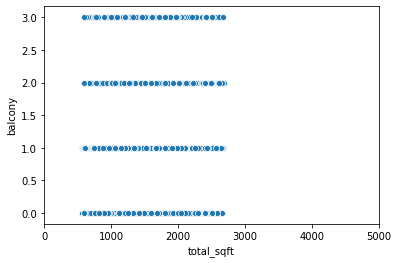

In [58]:
sns.scatterplot(outliers3.total_sqft,outliers3.balcony)
plt.xlim(0,5000)

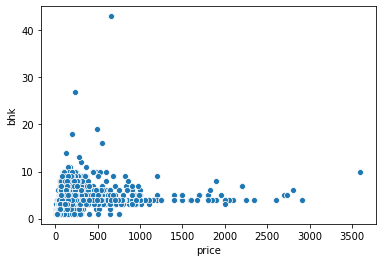

In [59]:
sns.scatterplot(data1.price,data1.bhk)

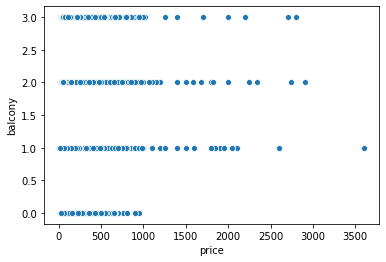

In [60]:

sns.scatterplot(data1.price,data1.balcony)

(0, 1000)

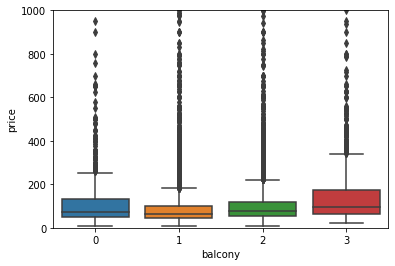

In [61]:
sns.boxplot(x=data1.balcony,y=data1.price)
plt.ylim(0,1000)

In [62]:
iso = IsolationForest(contamination=0.1)

iso.fit(data1[['balcony','price']])

pr = iso.predict(data1[['balcony','price']])

outliers4 = data1[predict==1]

outliers.shape

(12148, 10)

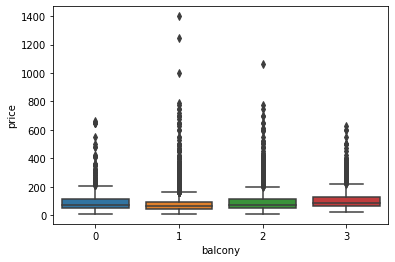

In [63]:
sns.boxplot(x=outliers4.balcony,y=outliers4.price)

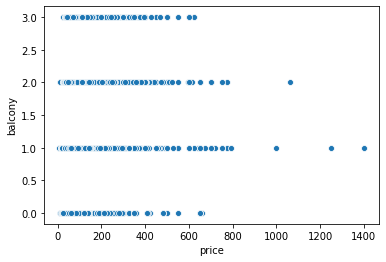

In [64]:
sns.scatterplot(outliers4.price,outliers4.balcony)

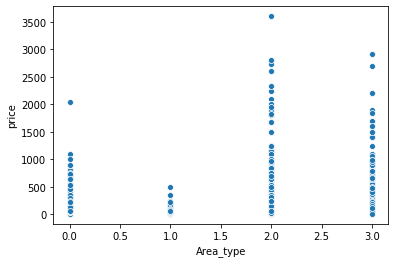

In [65]:
sns.scatterplot(data1.Area_type,data1.price)

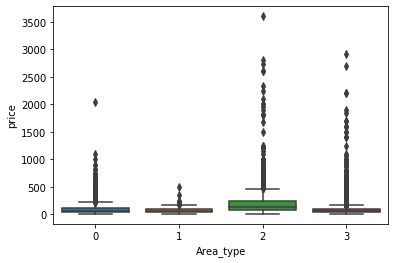

In [66]:
sns.boxplot(data1.Area_type,data1.price)

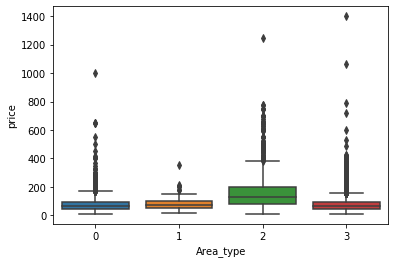

In [67]:
sns.boxplot(outliers3.Area_type,outliers3.price)

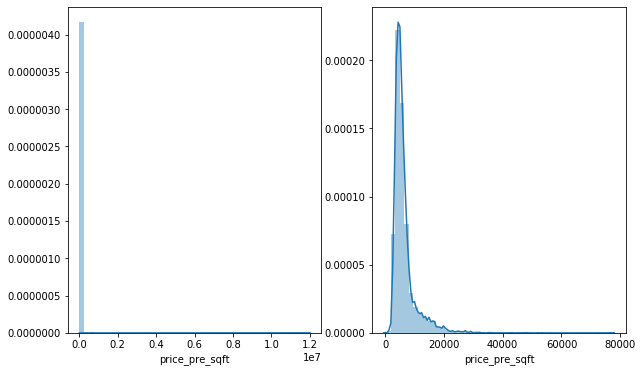

In [68]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(data1.price_pre_sqft)
plt.subplot(1,2,2)
sns.distplot(outliers3.price_pre_sqft)
plt.show()


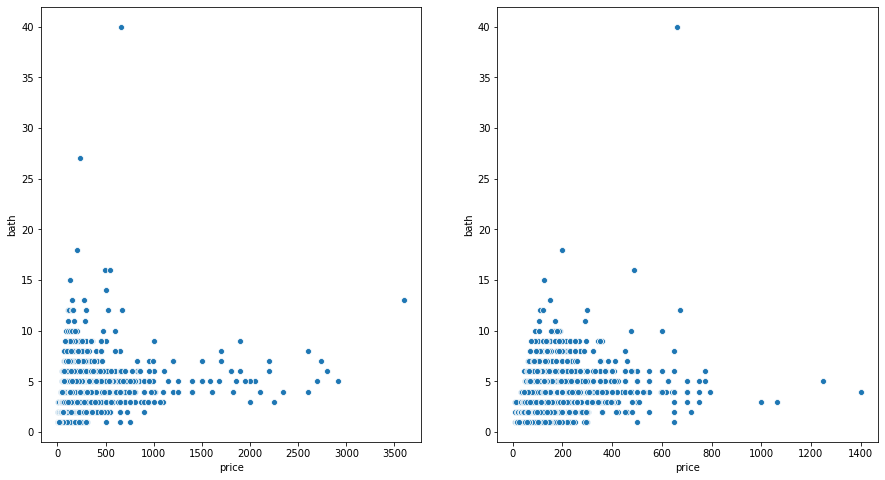

In [69]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(data1.price,data1.bath)
plt.subplot(1,2,2)
sns.scatterplot(outliers3.price,outliers3.bath)

### RealOutlier

In [70]:
data3 = data1[~(data1.total_sqft/data1.bhk<300)]
data3.shape

(12572, 10)

In [71]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_pre_sqft)
        st = np.std(subdf.price_pre_sqft)
        reduced_df = subdf[(subdf.price_pre_sqft>(m-st)) & (subdf.price_pre_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

data4 = remove_pps_outliers(data3)
data4.shape
    

(10349, 10)

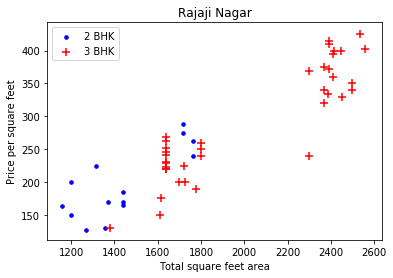

In [72]:
def plot_scatter_plot(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker='.',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='+',label='3 BHK', s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_plot(data4,"Rajaji Nagar")

In [73]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={'mean': np.mean(bhk_df.price_pre_sqft),
                           'std': np.std(bhk_df.price_pre_sqft),
                           'count':bhk_df.shape[0]
                           }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_pre_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data5 = remove_bhk_outliers(data4)
data5.shape

(7376, 10)

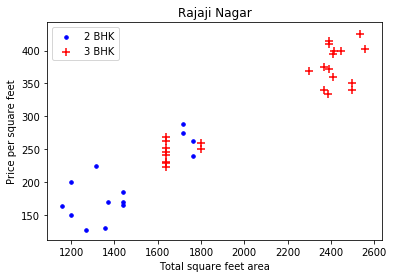

In [74]:
plot_scatter_plot(data5,'Rajaji Nagar')

Text(0.5, 1.0, 'Histogram of Price Per square feet')

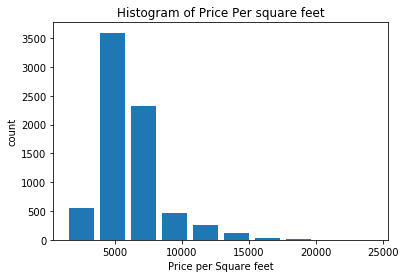

In [75]:
plt.hist(data5.price_pre_sqft,rwidth=0.8)
plt.xlabel("Price per Square feet")
plt.ylabel("count")
plt.title("Histogram of Price Per square feet")

In [76]:
data5[data5.bath>data5.bhk+1]

,location,society,total_sqft,bath,balcony,price,bhk,Availability,price_pre_sqft,Area_type
36,2nd Stage Nagarbhavi,GrrvaGr,3000.0,8,3,451.0,6,1,15033.333333,2
37,2nd Stage Nagarbhavi,GrrvaGr,2400.0,8,3,450.0,6,1,18750.000000,2
530,Arekere,RRnumn,2710.0,6,2,142.0,4,0,5239.852399,3
580,BTM 2nd Stage,GrrvaGr,1260.0,5,1,185.0,3,1,14682.539683,2
710,Banashankari,PrdgeSo,2582.0,5,2,250.0,3,1,9682.416731,3
...,...,...,...,...,...,...,...,...,...,...
10019,other,Prowshi,6652.0,6,1,510.0,4,1,7666.867108,3
10141,other,GrrvaGr,600.0,4,1,70.0,2,1,11666.666667,3
10195,other,Prleaou,5656.0,5,0,499.0,3,1,8822.489392,2
10310,other,Prowshi,6652.0,6,1,660.0,4,1,9921.828022,3


In [77]:
data6 = data5[data5.bath<data5.bhk+1]
data6.shape

(6910, 10)

In [78]:
data7 = data6.drop(['society','balcony','Availability','price_pre_sqft','Area_type'],axis=1)

data7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2


## Encoding categorical data

In [79]:
dummy = pd.get_dummies(data7['location'])
data8 = data7.join(dummy)
data8.drop(['location','other'],axis=1,inplace=True)   #drop location and last column
data8.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training

In [80]:
X = data8.drop('price',axis=1)
y = data8['price']

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,ShuffleSplit,cross_val_score
from sklearn.pipeline import Pipeline

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [83]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8914409567387891

In [88]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89392964, 0.83713691, 0.8709156 , 0.83654419, 0.76446038])

### Prediction

In [93]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [94]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

93.10060170846981

In [91]:
predict_price('Indira Nagar',1000, 3, 3)

203.4200506342467